In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the csv data to a Pandas DataFrame
df= pd.read_csv('/content/GOLD PRICE DATASET.csv')

In [ ]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
### checking shape
print('Original Dataframe shape :',df.shape)

Original Dataframe shape : (2290, 6)


In [ ]:
## Input features
X = df[['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']] # Select the columns you want to use as features
print('Inputs Dataframe shape   :', X.shape)

Inputs Dataframe shape   : (2290, 6)


In [ ]:
# Mean
X_mean = X.drop('Date', axis=1).mean() # Exclude the 'Date' column from the mean calculation
# Standard deviation
X_std = X.drop('Date', axis=1).std() # Exclude the 'Date' column from the std calculation
# Standardization
Z = (X.drop('Date', axis=1) - X_mean) / X_std # Exclude the 'Date' column from standardization

In [ ]:
Z

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [ ]:
# covariance
c = Z.cov()

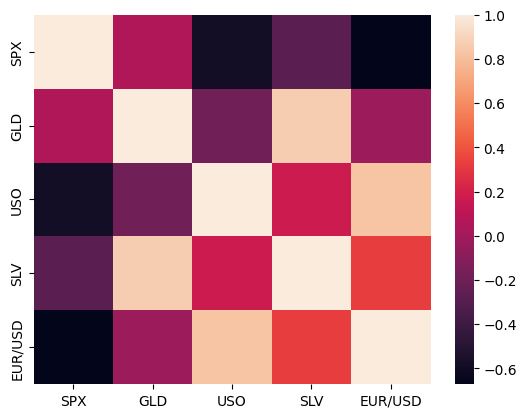

In [ ]:
# Plot the covariance matrix
sns.heatmap(c)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [2.53660993 1.8224995  0.43338324 0.05743726 0.15007008]
Eigen values Shape: (5,)
Eigen Vector Shape: (5, 5)


In [ ]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
 # Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]
 # sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [ ]:

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.50732199, 0.87182188, 0.95849853, 0.98851255, 1.        ])

In [ ]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

1

In [ ]:
n_components = np.argmax(explained_var >= 0.50) + 1

print(f'Number of components to retain at least 50% variance: {n_components}')

Number of components to retain at least 50% variance: 1


In [ ]:
#Import the PCA class from the sklearn.decomposition module
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Exclude the 'Date' column from scaling
df_scaled = scaler.fit_transform(df.drop('Date', axis=1)) # Drop the 'Date' column before scaling

# Step 5: Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
df_pca = pca_optimal.fit_transform(df_scaled)

In [ ]:
# Step 5: Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
df_pca = pca_optimal.fit_transform(df_scaled

In [ ]:

# If you want to create a DataFrame from the PCA result
import pandas as pd
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [ ]:

# Display the transformed dataset
print(df_pca.head())


        PC1  PC2
0  1.940110  NaN
1  1.957290  NaN
2  1.960745  NaN
3  1.868286  NaN
4  2.333334  NaN


In [ ]:
# Drop rows with missing values
df_clean = df.dropna()

# Standardize and apply PCA on the cleaned dataset
scaler = StandardScaler()
#Exclude the 'Date' column from scaling
df_scaled = scaler.fit_transform(df_clean.drop('Date', axis=1)) # Drop the 'Date' column before scaling

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0  1.940110 -2.427223
1  1.957290 -2.397392
2  1.960745 -2.416917
3  1.868286 -2.407067
4  2.333334 -2.395721
